In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import KFold
import random

BeeCiteRaw = pd.read_csv('/Users/nickbachelder/Desktop/UCSB Archive/Spring 2021/197C/BeeCiteRaw')
BeeCiteC5 = pd.read_csv('/Users/nickbachelder/Desktop/UCSB Archive/Spring 2021/197C/BeeCiteC5')
BeeCiteW = pd.read_csv('/Users/nickbachelder/Desktop/UCSB Archive/Spring 2021/197C/BeeCiteW')
BeeCiteRaw

,Unnamed: 0,interestBee,interact,n,n_Bee,BeeFreq,degree,west_specialist,east_specialist,cent_specialist,specialist
0,1,acamptopoeum submetallicum,malvaceae,8,26,0.000118,5,NaN,NaN,NaN,0
1,2,acamptopoeum submetallicum,salicaceae,10,26,0.000118,5,NaN,NaN,NaN,0
2,3,afroheriades primus,asteraceae,7,9,0.000041,3,NaN,NaN,NaN,0
3,4,agapostemon angelicus,aizoaceae,10,809,0.003678,37,NaN,NaN,NaN,0
4,5,agapostemon angelicus,amaranthaceae,12,809,0.003678,37,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
5220,5221,xylocopa virginica,cornaceae,9,1487,0.006761,76,NaN,NaN,NaN,0
5221,5222,xylocopa virginica,clethraceae,11,1487,0.006761,76,NaN,NaN,NaN,0
5222,5223,xylocopa virginica,berberidaceae,13,1487,0.006761,76,NaN,NaN,NaN,0
5223,5224,xylocopa virginica,amaryllidaceae,10,1487,0.006761,76,NaN,NaN,NaN,0


In [2]:
### One issue is that, since there are way more samples of non-specialists, the algorithm tends to want to 
## classify all as non-specialists to easily achieve a high accuracy. To fight this, I sampled 250 specialists and 
## 250 non specialists to train with

np.random.seed(7)

BeeCiteRawSpecilists = BeeCiteRaw[BeeCiteRaw['specialist'] == 1][['n_Bee', 'degree', 'specialist']].drop_duplicates()
BeeCiteRawGeneralists = BeeCiteRaw[BeeCiteRaw['specialist'] == 0]
BeeCiteRawSpecilists_sample = BeeCiteRawSpecilists.sample(n=200)
BeeCiteRawGeneralists_sample = BeeCiteRawGeneralists.sample(n=200)
BeeCiteRaw_Filtered = BeeCiteRawSpecilists_sample.append(BeeCiteRawGeneralists_sample)
BeeCiteRaw_Filtered = BeeCiteRaw_Filtered[['n_Bee', 'degree', 'specialist']].drop_duplicates()


BeeCiteC5Specilists = BeeCiteC5[BeeCiteC5['specialist'] == 1][['n_Bee', 'degree', 'specialist']].drop_duplicates()
BeeCiteC5Generalists = BeeCiteC5[BeeCiteC5['specialist'] == 0]
BeeCiteC5Specilists_sample = BeeCiteC5Specilists.sample(n=200)
BeeCiteC5Generalists_sample = BeeCiteC5Generalists.sample(n=200)
BeeCiteC5_Filtered = BeeCiteC5Specilists_sample.append(BeeCiteC5Generalists_sample)
BeeCiteC5_Filtered = BeeCiteC5_Filtered[['n_Bee', 'degree', 'specialist']].drop_duplicates()

BeeCiteWSpecilists = BeeCiteW[BeeCiteW['specialist'] == 1][['n_Bee', 'degree', 'specialist']].drop_duplicates()
BeeCiteWGeneralists = BeeCiteW[BeeCiteW['specialist'] == 0]
BeeCiteWSpecilists_sample = BeeCiteWSpecilists.sample(n=200)
BeeCiteWGeneralists_sample = BeeCiteWGeneralists.sample(n=200)
BeeCiteW_Filtered = BeeCiteWSpecilists_sample.append(BeeCiteWGeneralists_sample)

In [3]:
### This block checks the average validation errors for each degree type for logistic regression

from sklearn.linear_model import LogisticRegression

for data in range(3):
    if data == 0:
        df = BeeCiteRaw_Filtered
    if data == 1:
        df = BeeCiteC5_Filtered
    if data == 2:
        df = BeeCiteW_Filtered
    
    cv = KFold(n_splits=5)
    cv.get_n_splits(df)

    results = df[['specialist']]
    df = df[['n_Bee' , 'degree']]
    
    p_Accs = []
    
    for train_index, test_index in cv.split(df):
        X_train = df.iloc[train_index,:]
        X_test = df.iloc[test_index,:]
        y_train = results.iloc[train_index,:]
        y_test = results.iloc[test_index,:]
        lr = LogisticRegression()
        lr.fit(X_train, y_train.values.ravel())
        y_pred_lr = lr.predict(X_test)
        p_Accs.append(sklearn.metrics.accuracy_score(y_test, y_pred_lr))
        
    average_accuracy = sum(p_Accs)/len(p_Accs)
    if data == 0:
        print('BeeCiteRaw Average LR accuracy is', average_accuracy)
    if data == 1:
        print('BeeCiteC5 Average LR accuracy is', average_accuracy)
    if data == 2:
        print('BeeCiteW Average LR accuracy is', average_accuracy)

BeeCiteRaw Average LR accuracy is 0.7169014084507042
BeeCiteC5 Average LR accuracy is 0.7489855072463768
BeeCiteW Average LR accuracy is 0.78


In [4]:
import sklearn
from sklearn import svm
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### This block checks the average validation errors for each degree type for random forest

for data in range(3):
    if data == 0:
        df = BeeCiteRaw_Filtered
    if data == 1:
        df = BeeCiteC5_Filtered
    if data == 2:
        df = BeeCiteW_Filtered
    
    cv = KFold(n_splits=5)
    cv.get_n_splits(df)

    results = df[['specialist']]
    df = df[['n_Bee' , 'degree']]
    
    p_Accs = []
    
    for train_index, test_index in cv.split(df):
        X_train = df.iloc[train_index,:]
        X_test = df.iloc[test_index,:]
        y_train = results.iloc[train_index,:]
        y_test = results.iloc[test_index,:]
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train.values.ravel())
        y_pred_rf = rf.predict(X_test)
        p_Accs.append(sklearn.metrics.accuracy_score(y_test, y_pred_rf))
        
    average_accuracy = sum(p_Accs)/len(p_Accs)
    if data == 0:
        print('BeeCiteRaw Average RF accuracy is', average_accuracy)
    if data == 1:
        print('BeeCiteC5 Average RF accuracy is', average_accuracy)
    if data == 2:
        print('BeeCiteW Average RF accuracy is', average_accuracy)

BeeCiteRaw Average RF accuracy is 0.625
BeeCiteC5 Average RF accuracy is 0.6061697722567287
BeeCiteW Average RF accuracy is 0.76


In [5]:
### This block checks the average validation errors for each degree type for decision tree

for data in range(3):
    if data == 0:
        df = BeeCiteRaw_Filtered
    if data == 1:
        df = BeeCiteC5_Filtered
    if data == 2:
        df = BeeCiteW_Filtered
    
    cv = KFold(n_splits=5)
    cv.get_n_splits(df)

    results = df[['specialist']]
    df = df[['n_Bee' , 'degree']]
    
    p_Accs = []
    
    for train_index, test_index in cv.split(df):
        X_train = df.iloc[train_index,:]
        X_test = df.iloc[test_index,:]
        y_train = results.iloc[train_index,:]
        y_test = results.iloc[test_index,:]
        rf = DecisionTreeClassifier(max_depth = 2)
        rf.fit(X_train, y_train.values.ravel())
        y_pred_rf = rf.predict(X_test)
        p_Accs.append(sklearn.metrics.accuracy_score(y_test, y_pred_rf))
        
    average_accuracy = sum(p_Accs)/len(p_Accs)
    if data == 0:
        print('BeeCiteRaw Average DT accuracy is', average_accuracy)
    if data == 1:
        print('BeeCiteC5 Average DT accuracy is', average_accuracy)
    if data == 2:
        print('BeeCiteW Average DT accuracy is', average_accuracy)

BeeCiteRaw Average DT accuracy is 0.6582159624413146
BeeCiteC5 Average DT accuracy is 0.7397929606625259
BeeCiteW Average DT accuracy is 0.7825000000000001


In [6]:
## Fit data to filtered data and use it to predict origonal full datasets

rfRaw = RandomForestClassifier()
rf5 = RandomForestClassifier()
rfW= RandomForestClassifier()

rfRaw.fit(BeeCiteRaw_Filtered[['n_Bee' , 'degree']], BeeCiteRaw_Filtered['specialist'].values.ravel())
rf5.fit(BeeCiteC5_Filtered[['n_Bee' , 'degree']], BeeCiteC5_Filtered['specialist'].values.ravel())
rfW.fit(BeeCiteW_Filtered[['n_Bee' , 'degree']], BeeCiteW_Filtered['specialist'].values.ravel())

BeeCiteRaw['predicted'] = rfRaw.predict(BeeCiteRaw[['n_Bee' , 'degree']])
BeeCiteC5['predicted'] = rf5.predict(BeeCiteC5[['n_Bee' , 'degree']])
BeeCiteW['predicted'] = rfW.predict(BeeCiteW[['n_Bee' , 'degree']])

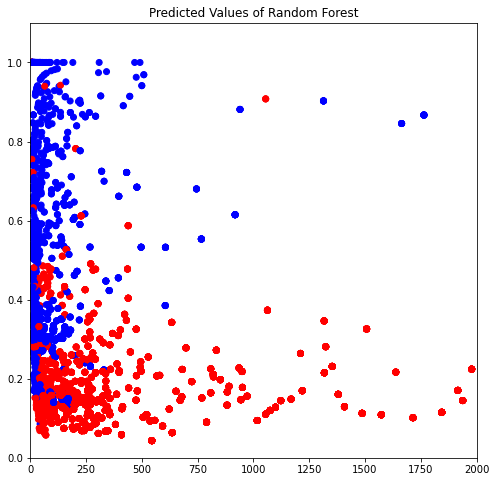

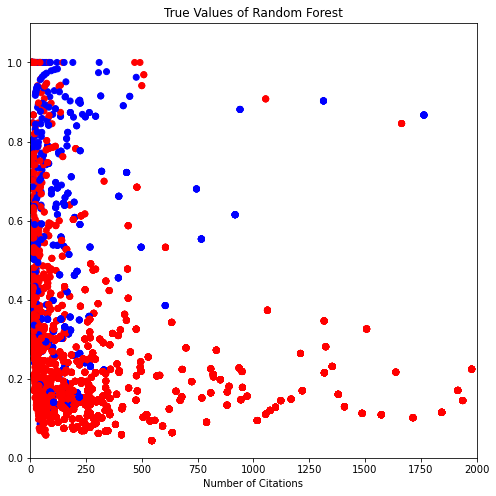

In [7]:
## TRUE VS PREDICTED values for weighted degree dataset

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

colors = {0:'red', 1: 'blue'}


plt.scatter(BeeCiteW['n_Bee'], BeeCiteW['degree'], c=BeeCiteW['predicted'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 1.1])
plt.title('Predicted Values of Random Forest')

plt.show()

fig = plt.figure(figsize=(8,8))
plt.scatter(BeeCiteW['n_Bee'], BeeCiteW['degree'], c=BeeCiteW['specialist'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 1.1])
plt.title('True Values of Random Forest')
plt.xlabel('Number of Citations')

plt.show()

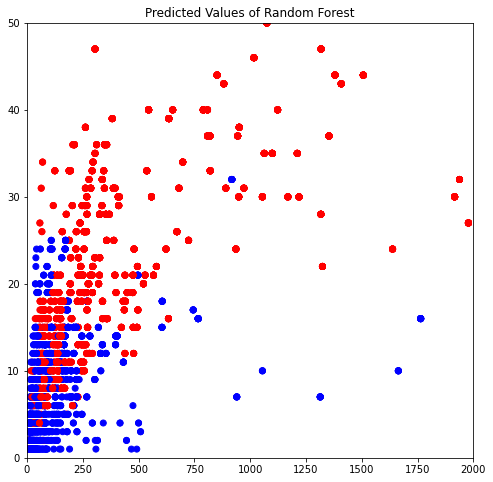

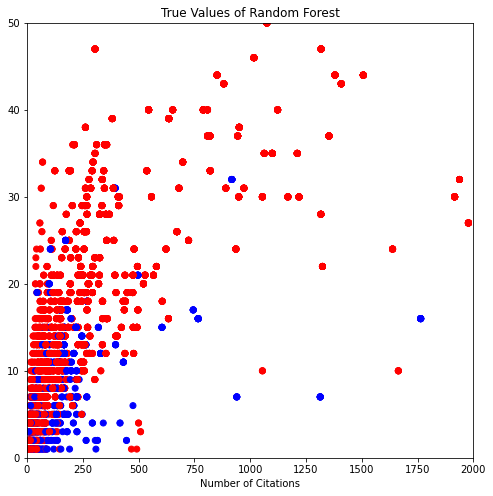

In [8]:
## TRUE VS PREDICTED values for raw degree set

fig = plt.figure(figsize=(8,8))

colors = {0:'red', 1: 'blue'}


plt.scatter(BeeCiteRaw['n_Bee'], BeeCiteRaw['degree'], c=BeeCiteRaw['predicted'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 50])
plt.title('Predicted Values of Random Forest')

plt.show()

fig = plt.figure(figsize=(8,8))
plt.scatter(BeeCiteRaw['n_Bee'], BeeCiteRaw['degree'], c=BeeCiteRaw['specialist'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 50])
plt.title('True Values of Random Forest')
plt.xlabel('Number of Citations')

plt.show()

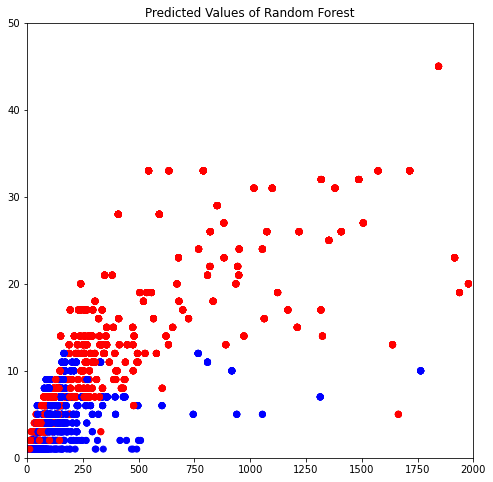

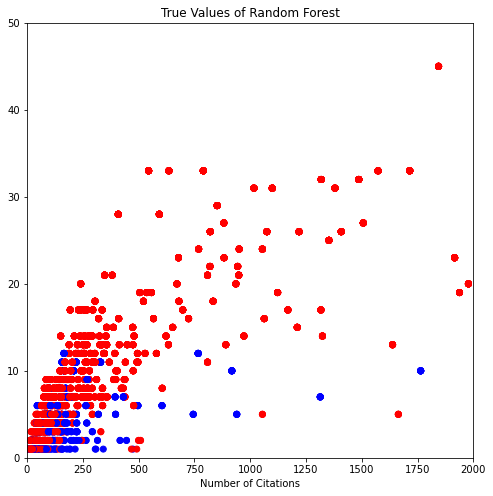

In [9]:
## TRUE VS PREDICTED values for degree set cut at 5 predicitons

fig = plt.figure(figsize=(8,8))

colors = {0:'red', 1: 'blue'}


plt.scatter(BeeCiteC5['n_Bee'], BeeCiteC5['degree'], c=BeeCiteC5['predicted'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 50])
plt.title('Predicted Values of Random Forest')

plt.show()

fig = plt.figure(figsize=(8,8))
plt.scatter(BeeCiteC5['n_Bee'], BeeCiteC5['degree'], c=BeeCiteC5['specialist'].map(colors))
plt.xlim([0, 2000])
plt.ylim([0, 50])
plt.title('True Values of Random Forest')
plt.xlabel('Number of Citations')

plt.show()

In [10]:
## Find accuracies for different citation cuts of the degree filtered at 5 citations set

from tqdm import tqdm

cuts = []
accuracies = []
for cut in tqdm(range(0, 600, 10)):
    cuts.append(cut)
    df= BeeCiteC5_Filtered.loc[BeeCiteC5_Filtered['n_Bee'] > cut]
    
    cv = KFold(n_splits=5)
    cv.get_n_splits(df)

    results = df[['specialist']]
    df = df[['n_Bee' , 'degree']]
    
    p_Accs = []
    
    for train_index, test_index in cv.split(df):
        X_train = df.iloc[train_index,:]
        X_test = df.iloc[test_index,:]
        y_train = results.iloc[train_index,:]
        y_test = results.iloc[test_index,:]
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train.values.ravel())
        y_pred_rf = rf.predict(X_test)
        p_Accs.append(sklearn.metrics.accuracy_score(y_test, y_pred_rf))
        
    average_accuracy = sum(p_Accs)/len(p_Accs)
    accuracies.append(average_accuracy)

d = {'Cuts': cuts, 'Accuracies' : accuracies}
cutdf = pd.DataFrame(d, columns = ['Cuts', 'Accuracies'])

100%|██████████| 60/60 [00:21<00:00,  2.75it/s]


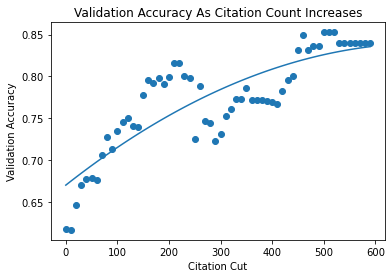

In [11]:
import matplotlib.pyplot as plt

(m, v, b) = np.polyfit(cutdf['Cuts'], cutdf['Accuracies'], 2)

yp = np.polyval([m, v, b], cutdf['Cuts'])
plt.title('Validation Accuracy As Citation Count Increases')
plt.xlabel('Citation Cut')
plt.ylabel('Validation Accuracy')
plt.plot(cutdf['Cuts'], yp)
plt.scatter(cutdf['Cuts'], cutdf['Accuracies'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d1bda89-622f-445f-bbb3-56769dd25472' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>